<a href="https://colab.research.google.com/github/Mallmulk/PemrogVisualWinform_P4/blob/main/Tugas_8_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Binary Sentiment

In [1]:
texts = [
    "Saya sangat menyukai produk ini, kualitasnya bagus sekali",
    "Pelayanan di toko itu benar-benar memuaskan",
    "Pengalaman berbelanja yang sangat menyenangkan",
    "Rasanya enak dan harganya cukup terjangkau",
    "Film itu sangat menginspirasi dan penuh pesan moral",
    "Aplikasi ini sangat membantu pekerjaan saya",
    "Desainnya elegan dan nyaman digunakan",
    "Tempatnya bersih dan pelayanannya cepat",
    "Saya merasa sangat puas dengan hasilnya",
    "Laptop ini performanya luar biasa",

    "Produk ini sangat mengecewakan",
    "Saya tidak suka pelayanannya, sangat lambat",
    "Makanannya hambar dan tidak layak untuk harganya",
    "Aplikasi sering error dan membuat frustrasi",
    "Filmnya membosankan dan terlalu panjang",
    "Tempatnya kotor dan tidak nyaman",
    "Barang datang dalam kondisi rusak",
    "Pengirimannya sangat lama dan tidak sesuai janji",
    "Laptop ini sering hang dan membuat kesal",
    "Saya sangat kecewa dengan kualitas produk ini",
] * 6  # ulang agar total ±120 kalimat

labels = ([1]*10 + [0]*10) * 6


Implementasi LSTM (Keras) + Training Curve

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 165ms/step - accuracy: 0.5082 - loss: 0.6947 - val_accuracy: 0.3750 - val_loss: 0.6975
Epoch 2/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.4499 - loss: 0.6953 - val_accuracy: 0.3750 - val_loss: 0.6981
Epoch 3/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5530 - loss: 0.6916 - val_accuracy: 0.3750 - val_loss: 0.7065
Epoch 4/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.4918 - loss: 0.6952 - val_accuracy: 0.3750 - val_loss: 0.7081
Epoch 5/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5455 - loss: 0.6897 - val_accuracy: 0.3750 - val_loss: 0.7135


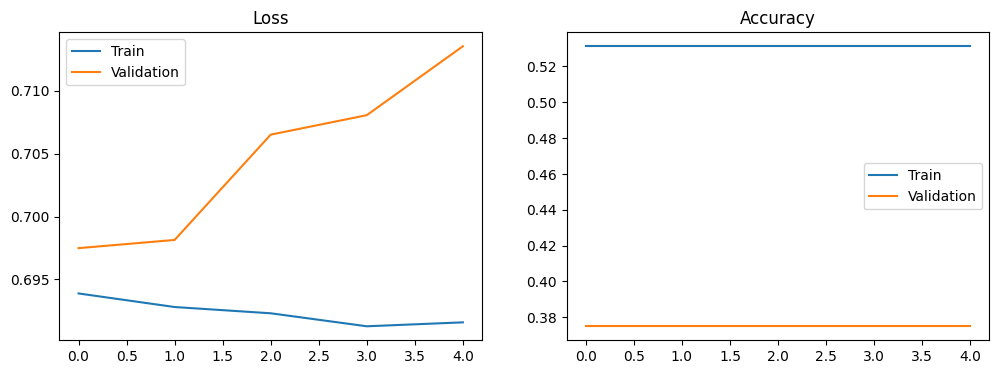

In [2]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# --- DATASET ---
# menggunakan texts dan labels dari atas
texts = np.array(texts)
labels = np.array(labels)

# --- Tokenisasi ---
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)

sequences = tokenizer.texts_to_sequences(texts)
padded = pad_sequences(sequences, maxlen=50, padding='post')

# --- Train Test Split ---
X_train, X_val, y_train, y_val = train_test_split(
    padded, labels, test_size=0.2, random_state=42
)

# --- MODEL LSTM KERAS ---
model = Sequential([
    Embedding(5000, 64, input_length=50),
    LSTM(64),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# --- TRAINING ---
history = model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=16,
    validation_data=(X_val, y_val)
)

# --- GRAFIK TRAINING CURVE ---
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Loss")
plt.legend(["Train", "Validation"])

plt.subplot(1,2,2)
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Accuracy")
plt.legend(["Train", "Validation"])

plt.show()

# Simpan model
model.save("keras_lstm_sentiment.h5")


Implementasi LSTM (PyTorch) + Evaluasi

In [3]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from collections import Counter
import re
import numpy as np

# --- Tokenisasi sederhana ---
def tokenize(text):
    return re.findall(r"\w+", text.lower())

# Bangun vocab
counter = Counter()
for t in texts:
    counter.update(tokenize(t))

vocab = {w:i+2 for i,w in enumerate(counter.keys())}
vocab["<PAD>"] = 0
vocab["<UNK>"] = 1

def encode_sentence(text, maxlen=50):
    tokens = tokenize(text)
    ids = [vocab.get(t, 1) for t in tokens]
    if len(ids) < maxlen:
        ids += [0]*(maxlen - len(ids))
    else:
        ids = ids[:maxlen]
    return torch.tensor(ids)

# --- Dataset PyTorch ---
class SentDataset(Dataset):
    def __init__(self, texts, labels):
        self.X = [encode_sentence(t) for t in texts]
        self.y = torch.tensor(labels).float()
    def __len__(self):
        return len(self.y)
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

X_train, X_val, y_train, y_val = train_test_split(texts, labels, test_size=0.2, random_state=42)

train_ds = SentDataset(X_train, y_train)
val_ds   = SentDataset(X_val, y_val)

train_loader = DataLoader(train_ds, batch_size=16, shuffle=True)
val_loader   = DataLoader(val_ds, batch_size=16)

# --- Model LSTM ---
class LSTMModel(nn.Module):
    def __init__(self, vocab_size, embed_dim=64, hidden_dim=64):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim, padding_idx=0)
        self.lstm = nn.LSTM(embed_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.embedding(x)
        _, (h, _) = self.lstm(x)
        out = self.fc(h[-1])
        return self.sigmoid(out).squeeze(1)

model = LSTMModel(len(vocab) + 2)
loss_fn = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# --- TRAINING ---
for epoch in range(5):
    model.train()
    for Xb, yb in train_loader:
        pred = model(Xb)
        loss = loss_fn(pred, yb)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch+1} selesai")

# --- VALIDASI ---
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for Xb, yb in val_loader:
        pred = model(Xb)
        pred_label = (pred >= 0.5).float()
        correct += (pred_label == yb).sum()
        total += len(yb)

print("Akurasi Validasi PyTorch:", float(correct/total))

# Simpan model
torch.save(model.state_dict(), "pytorch_lstm_sentiment.pt")


Epoch 1 selesai
Epoch 2 selesai
Epoch 3 selesai
Epoch 4 selesai
Epoch 5 selesai
Akurasi Validasi PyTorch: 0.375
